# Preprocessing

In [1]:
import pandas as pd

# Load and clean
df = pd.read_csv("WID_data_IN.csv", sep=';')
df_ptinc = df[df['variable'].str.contains('ptinc', na=False)].copy()

# Convert types
df_ptinc["year"] = pd.to_numeric(df_ptinc["year"], errors='coerce')
df_ptinc["value"] = pd.to_numeric(df_ptinc["value"], errors='coerce')
df_ptinc.dropna(inplace=True)


# EDA

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


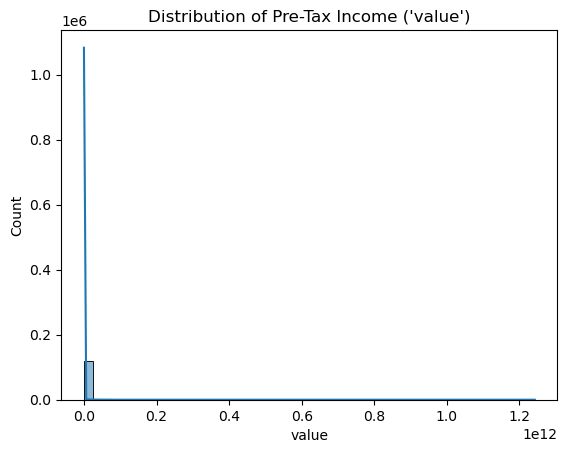

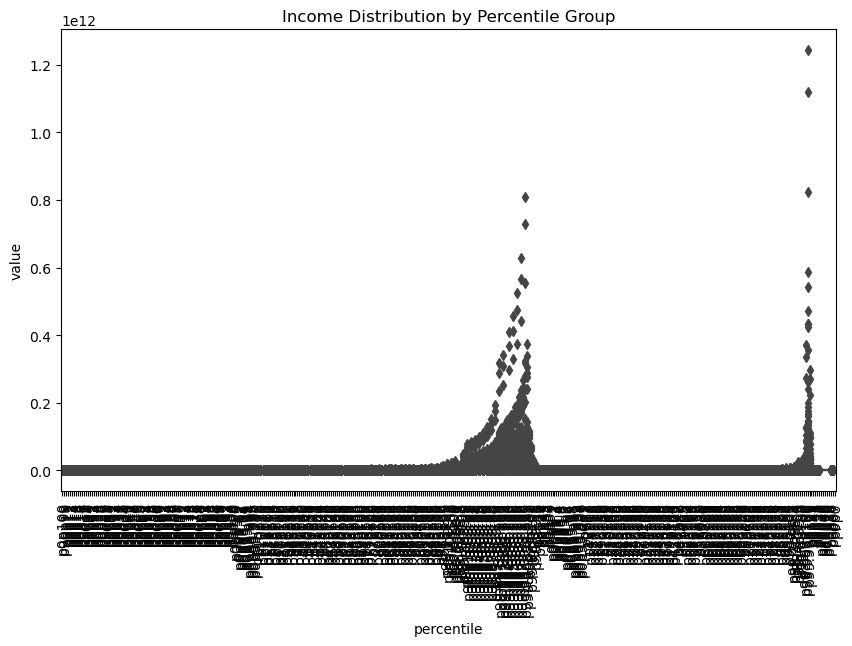

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


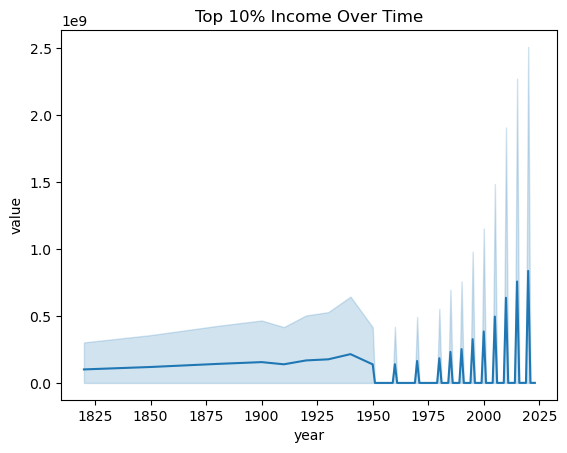

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of values
sns.histplot(df_ptinc["value"], bins=50, kde=True)
plt.title("Distribution of Pre-Tax Income ('value')")
plt.show()

# Boxplot by percentile
plt.figure(figsize=(10,6))
sns.boxplot(data=df_ptinc, x="percentile", y="value")
plt.xticks(rotation=90)
plt.title("Income Distribution by Percentile Group")
plt.show()

# Trend over years for top 10%
sns.lineplot(data=df_ptinc[df_ptinc["percentile"] == "p90p100"], x="year", y="value")
plt.title("Top 10% Income Over Time")
plt.show()


In [4]:
df_encoded = pd.get_dummies(df_ptinc, columns=["percentile", "variable", "pop", "age"], drop_first=True)


In [5]:
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop(["value", "country"], axis=1)
y = df_encoded["value"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(n_estimators=100)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = mean_squared_error(y_test, preds, squared=False)
    print(f"{name} → R²: {r2:.4f}, RMSE: {rmse:.2f}")


Linear Regression → R²: 0.0677, RMSE: 10548718830.74
Ridge Regression → R²: 0.0677, RMSE: 10548415090.43
